In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


sns.set(style="whitegrid", palette="Set2")

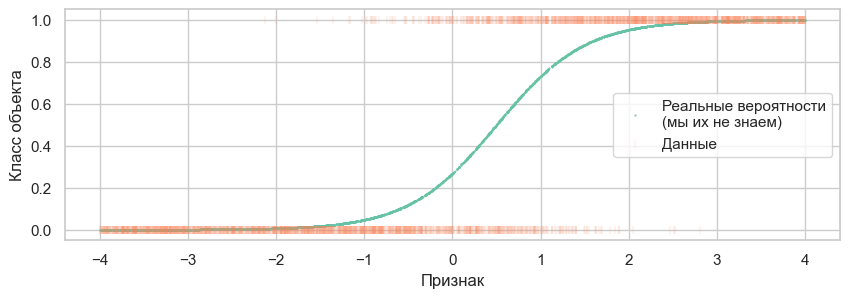

In [11]:
sample_size = 3_000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

In [12]:
from sklearn.linear_model import LogisticRegression
a = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=True, max_iter=10000)
a.fit(X, y.ravel())

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [13]:

import sklearn, sklearn.linear_model
print(sklearn.__version__)
print(sklearn.linear_model.__file__)



1.7.2
c:\Users\IvanC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\__init__.py


In [14]:
print("intercept_ (свободный член):", a.intercept_[0])
print("coef_ (коэффициент при признаке):", a.coef_[0][0])

intercept_ (свободный член): -0.9772250051955169
coef_ (коэффициент при признаке): 1.9660179524318921


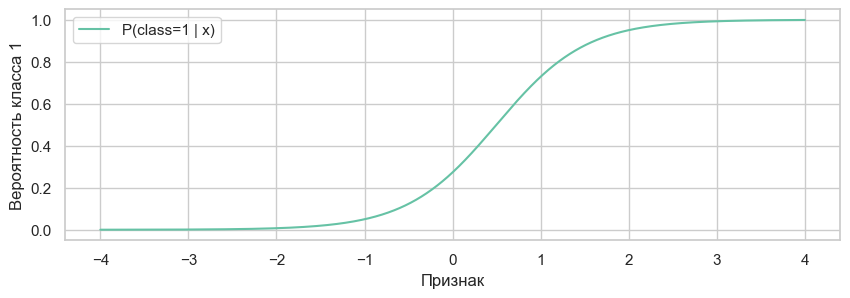

C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\2343589151.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


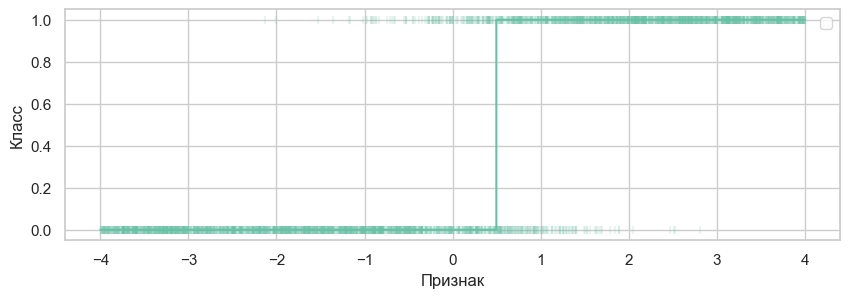

In [15]:
X_grid = np.linspace(-4, 4, 10_000).reshape((-1, 1))
a.predict(X_grid)
arr = np.array(10000,)
z = a.intercept_[0] + a.coef_[0][0] * X_grid[:, 0]
p_grid = 1.0 / (1.0 + np.exp(-z))
p_class = np.where(p_grid >= 0.5, 1, 0)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(X_grid[:, 0], p_grid, label='P(class=1 | x)')
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('Вероятность класса 1')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.step(X_grid[:,0], p_class)
plt.scatter(X[:,0], y, marker='|', alpha=0.15)
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('Класс')
plt.legend()


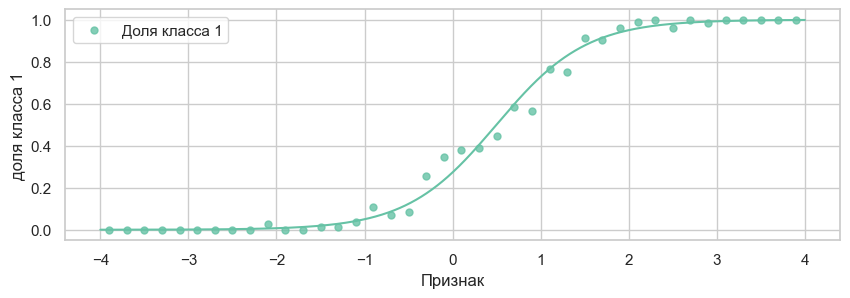

In [16]:
bins = np.array([x / 10.0 for x in range(-40, 41, 2)])
cen = (bins[:-1] + bins[1:]) / 2
index = np.digitize(X[:, 0], bins, right=False) - 1
index = np.clip(index, 0, len(bins) - 2) 

df = pd.DataFrame({'bin': index, 'y': y.ravel()})
df = df.groupby('bin')['y'].agg(['mean', 'size']).reset_index()

p_em = np.full(len(cen), np.nan)
p_em[df['bin'].to_numpy()] = df['mean'].to_numpy()


plt.figure(figsize=(10, 3))
plt.plot(X_grid[:, 0], p_grid)
plt.scatter(cen, p_em, s=25, alpha=0.8, label='Доля класса 1')
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend(); plt.show()

C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\2038145093.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


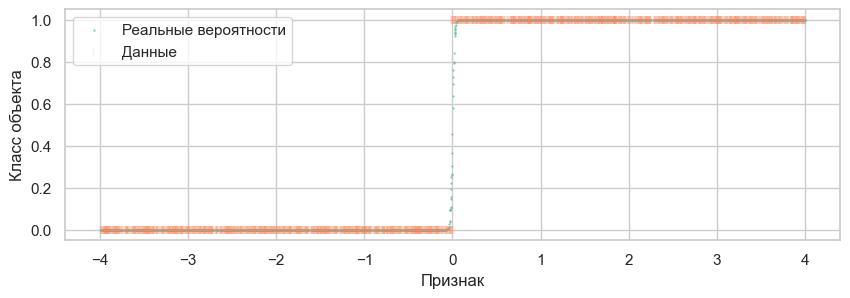

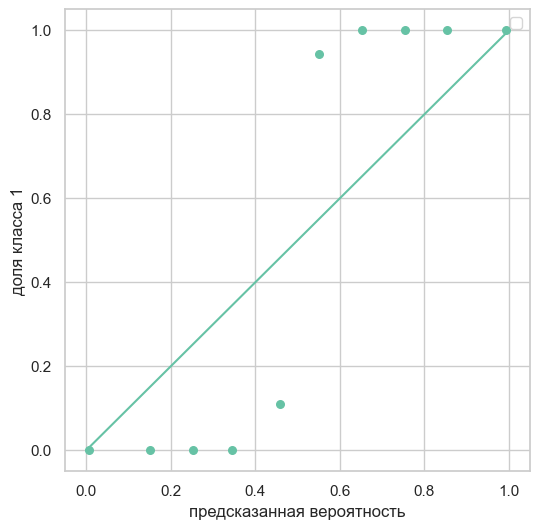

In [17]:
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();


mod = LogisticRegression(penalty="l2", fit_intercept=True, max_iter = 10000, solver = "lbfgs", C  = 0.1)
mod.fit(X, y)
p_h = mod.predict_proba(X)[:, 1]
bins = np.array([x / 10.0 for x in range(0, 11)])
index = np.digitize(p_h, bins, right=True) - 1
index = np.clip(index, 0, len(bins) - 2)

df = pd.DataFrame({'bin': index, 'p': p_h, 'y': y.ravel()})
g = df.groupby('bin').agg(p_mean=('p','mean'), y_mean=('y','mean')).reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], '-')
plt.scatter(g['p_mean'], g['y_mean'], s=30)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('предсказанная вероятность')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend()
plt.show()




C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\3111862182.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


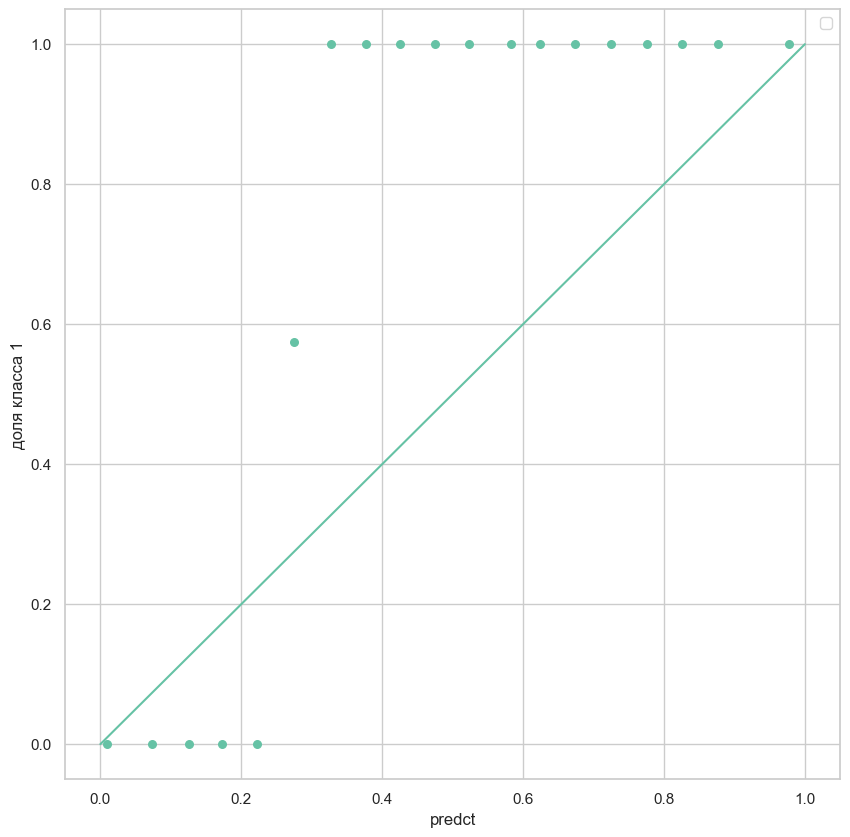

In [18]:

p_h = a.predict_proba(X)[:, 1]
bins = np.array([x / 100.0 for x in range(0, 100, 5)])
cen = (bins[:-1] + bins[1:]) / 2
index = np.digitize(p_h, bins, right=False) - 1
index = np.clip(index, 0, len(bins) - 2) 

df = pd.DataFrame({'bin': index, 'p': p_h, 'y': y.ravel()})
g = df.groupby('bin').agg(p_mean=('p','mean'), y_mean=('y','mean'))



plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], '-')
plt.scatter(g['p_mean'], g['y_mean'], s=30)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('predct')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend()
plt.show()




In [19]:
#next

In [20]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10_000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,1,1,0
1,1,0,1
2,0,1,0
3,1,1,0
4,0,0,0


In [21]:

share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
print(share)

                       target
feature_1 feature_2          
0         0          0.390536
          1          0.213284
1         0          0.888310
          1          0.474936


In [22]:

y = data['target']
X = data.drop(columns=['target'])

mod = LogisticRegression(penalty =None, fit_intercept=True, max_iter = 10000, solver = "lbfgs")
mod.fit(X, y)

unique = pd.DataFrame([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], columns=['feature_1', 'feature_2'])

p = mod.predict_proba(unique)
print(p)
print(p[:, 1])

#Чтобы было удобно сравнивать, создадим новый DataFrame, в котором будут 
# и реальные частоты (из прошлого задания), и предсказанные моделью вероятности.
share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
share['p'] = p[:, 1]
print(share)

[[0.57235254 0.42764746]
 [0.86891731 0.13108269]
 [0.16440025 0.83559975]
 [0.49352983 0.50647017]]
[0.42764746 0.13108269 0.83559975 0.50647017]
                       target         p
feature_1 feature_2                    
0         0          0.390536  0.427647
          1          0.213284  0.131083
1         0          0.888310  0.835600
          1          0.474936  0.506470


In [23]:
X = data[['feature_1','feature_2']]
y = data['target']
X['x1x2'] = X['feature_1'] * X['feature_2']

mod = LogisticRegression(penalty=None, fit_intercept = True, solver='lbfgs', max_iter=10000)
mod.fit(X, y)

grid = pd.DataFrame([(0,0,0),(0,1,0),(1,0,0),(1,1,1)], columns=['feature_1','feature_2','x1x2'])
share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
share['p'] = mod.predict_proba(grid)[:,1]
print(share)

                       target         p
feature_1 feature_2                    
0         0          0.390536  0.390460
          1          0.213284  0.213358
1         0          0.888310  0.888373
          1          0.474936  0.474994


In [24]:
from sklearn.base import BaseEstimator
from scipy.special import logsumexp
from time import time
from typing import Literal


class LogisticRegression(BaseEstimator):
    """Модель логистической регрессии.

    Параметры:
    method (Literal['gd', 'sgd']): Метод оптимизации ('gd' - градиентный спуск,
        'sgd' - стохастический градиентный спуск).
    learning_rate (float): Константа скорости обучения, на которую домножаем градиент при обучении
    tol (float): Допустимое изменение функционала между итерациями.
    max_iter (int): Максимальное число итераций.
    batch_size (int): Размер выборки для оценки градиента (используется только при 'sgd').
    fit_intercept (bool): Добавлять ли константу в признаки.
    save_history (bool): Сохранять ли историю обучения.
    """

    def __init__(
        self,
        method: Literal["gd", "sgd"] = "gd",
        learning_rate: float = 0.5,
        tol: float = 1e-3,
        max_iter: int = int(1e4),
        batch_size: int = 64,
        fit_intercept: bool = True,
        save_history: bool = True,
    ):
        """Создает модель и инициализирует параметры."""
        self.method = method
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # История обучения
        self.coef  = 0
        self.intercept = 0
        self.n_iter = 0

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        """Вычисляет сигмоидную функцию."""
        return 1 / (1 + np.exp(-x))

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, Y: np.ndarray) -> "LogisticRegression":
        """Обучает модель логистической регрессии.

        Также, в случае self.save_history=True, добавляет в self.history
        текущее значение оптимизируемого функционала и затраченное время.

        Параметры:
        X (np.ndarray): Матрица признаков.
        Y (np.ndarray): Вектор истинных меток.  

        Возвращает:
        LogisticRegression: Обученная модель.
        """
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Количество строк в X и Y должно совпадать")

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        len_data = X_copy.shape[0] # количество строк в data
        len_feature = X_copy.shape[1] # num 0f features

        self.weights = np.zeros(len_feature) # array of weghts = 0

        prev_loss = 1000000000000000000
        start_time = time() # for time and history
        
        for i in range(self.max_iter):
            if self.method == "gd":
                X_train, Y_train  = X_copy, Y # считаем по всем данным 
            if self.method == "sgd": # choice random data
                index = np.random.choice(len_data, self.batch_size, replace = False)
                X_train, Y_train = X_copy[index], Y[index]
            z = X_train @ self.weights
            predictions = self._sigmoid(z)
            error = predictions - Y_train
            gradient = (X_train.T @ error) / X_train.shape[0]
            self.weights = self.weights - self.learning_rate * gradient
            #loss_function = np.mean(((-Y_train @ np.log(predictions)) - ((1 - Y_train) @ np.log(1 - predictions))))
            z_full = X_copy @ self.weights
            log_p = logsumexp(np.vstack([np.zeros_like(z_full), z_full]), axis=0)
            loss_function = np.mean(log_p - Y * z_full)
            
            if self.save_history:
                time = time() - start_time
                self.history.append([loss_function, time])
                start_time = time()
            if abs(prev_loss - loss_function) < self.tol:
                print(f"stop, <tl, itre: {i+1}.")
                break
            prev_loss = loss_function



        self.coef_ = self.weights[:-1]  # Коэффициенты модели
        self.intercept_ = self.weights[-1]  # Свободный коэффициент, вот тут пдстава конечно жесткая была, я долго думал, что он [0]
        self.n_iter_ = i+1  # Число итераций

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        prediction = self.predict_proba(X)[:, 1]
        predictions = (prediction >= 0.5).astype(int)
        return predictions

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности классов 0 и 1.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Матрица вероятностей классов (n_samples,
        2).
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        predictions_class_1 =  self._sigmoid(X @ self.coef_ + self.intercept_)
        predictions_class_0 = 1 - predictions_class_1
        predictions_proba = np.column_stack((predictions_class_0, predictions_class_1))
        return predictions_proba
